# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities

['vao',
 'tsihombe',
 'mar del plata',
 'cape town',
 'coihaique',
 'hermanus',
 'airai',
 'namibe',
 'brigantine',
 'kahului',
 'bengkulu',
 'nanortalik',
 'qaanaaq',
 'upernavik',
 'wuchi',
 'kommunisticheskiy',
 'grand-santi',
 'atasu',
 'hasaki',
 'rikitea',
 'kendari',
 'vaitupu',
 'atuona',
 'fortuna',
 'illoqqortoormiut',
 'saskylakh',
 'ushuaia',
 'novopokrovka',
 'garissa',
 'arraial do cabo',
 'coquimbo',
 'beyneu',
 'saleilua',
 'albany',
 'viedma',
 'sesheke',
 'college',
 'punta arenas',
 'ambilobe',
 'sobolevo',
 'kavieng',
 'mahebourg',
 'khatanga',
 'victoria',
 'bredasdorp',
 'ossora',
 'sao filipe',
 'te anau',
 'iquique',
 'hobart',
 'gorno-chuyskiy',
 'vikhorevka',
 'mackay',
 'fuerte olimpo',
 'severo-kurilsk',
 'richards bay',
 'puerto escondido',
 'barentsburg',
 'egvekinot',
 'esperance',
 'mataura',
 'lockport',
 'provideniya',
 'hanyang',
 'vila velha',
 'yumen',
 'tarakan',
 'sao felix do xingu',
 'bluff',
 'hilo',
 'barrow',
 'altamont',
 'cidreira',
 'chapl

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?q="
query_url = url + cities[0] + "&appid=" + weather_api_key

response = requests.get(query_url)
weather_json = response.json()
weather_json
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': -22.6667, 'lon': 167.4833},
 'dt': 1635364734,
 'id': 2137773,
 'main': {'feels_like': 296.14,
          'grnd_level': 1006,
          'humidity': 85,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 295.62,
          'temp_max': 295.62,
          'temp_min': 295.62},
 'name': 'Vao',
 'sys': {'country': 'NC', 'sunrise': 1635358073, 'sunset': 1635404380},
 'timezone': 39600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 156, 'gust': 5.79, 'speed': 6.2}}


In [5]:
# base url
url = "http://api.openweathermap.org/data/2.5/weather?q="

#lists 
record_count = 0
weather = []

#print log Beginning Data Retrieval     -----------------------------
print("Beginning Data Retrieval")
print("-----------------------------")
#for loop for data with try "processing Record" and except "City not found. Skipping..."#
for city in cities[:25]:
    query_url = url + city + "&appid=" + weather_api_key
    #get weather data
    response = requests.get(query_url)
    weather_json = response.json()
    record_count = record_count + 1
    try:
    #insert a time function as needed with set?
        lat = weather_json['coord']['lat']
        lng = weather_json['coord']['lon']
        maxtemp = weather_json["main"]["temp_max"]
        humidity = weather_json["main"]["humidity"]
        cloudiness = weather_json["clouds"]["all"]
        windspeed = weather_json["wind"]["speed"]
        country = weather_json["sys"]["country"]
        city_name = weather_json ["name"]
        date = weather_json["dt"]
        weather.append({"City" : city_name,
                                    "Latitude": lat,
                                    "Longitude": lng,
                                    "Max Temp": maxtemp,
                                    "Humidity": humidity,
                                    "Cloudiness": cloudiness,
                                    "Wind Speed" : windspeed,
                                    "Country": country,
                                    "Date": date})
        print(f'Processing Record {record_count} | {city}') 
    except KeyError:
        print(f'{city} not found. Skipping...')
        pass
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")



Beginning Data Retrieval
-----------------------------
Processing Record 1 | vao
tsihombe not found. Skipping...
Processing Record 3 | mar del plata
Processing Record 4 | cape town
Processing Record 5 | coihaique
Processing Record 6 | hermanus
Processing Record 7 | airai
Processing Record 8 | namibe
Processing Record 9 | brigantine
Processing Record 10 | kahului
Processing Record 11 | bengkulu
Processing Record 12 | nanortalik
Processing Record 13 | qaanaaq
Processing Record 14 | upernavik
Processing Record 15 | wuchi
Processing Record 16 | kommunisticheskiy
Processing Record 17 | grand-santi
Processing Record 18 | atasu
Processing Record 19 | hasaki
Processing Record 20 | rikitea
Processing Record 21 | kendari
vaitupu not found. Skipping...
Processing Record 23 | atuona
Processing Record 24 | fortuna
illoqqortoormiut not found. Skipping...
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#create DF City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date
weather_df = pd.DataFrame(weather)
weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vao,-22.6667,167.4833,295.62,85,5,6.20,NC,1635364734
1,Mar del Plata,-38.0023,-57.5575,298.16,87,0,5.36,AR,1635364750
2,Cape Town,-33.9258,18.4232,293.20,71,0,1.79,ZA,1635364724
3,Coyhaique,-45.5752,-72.0662,289.12,44,75,6.17,CL,1635364562
4,Hermanus,-34.4187,19.2345,292.48,90,99,2.70,ZA,1635364759
5,Airai,-8.9266,125.4092,289.33,81,94,0.89,TL,1635364759
6,Mossamedes,-15.1961,12.1522,292.22,77,13,3.67,AO,1635364760
7,Brigantine,39.4101,-74.3646,291.50,73,95,8.90,US,1635364760
8,Kahului,20.8947,-156.4700,301.47,73,1,5.36,US,1635364760
9,Bengkulu,-3.8004,102.2655,297.83,85,100,1.64,ID,1635364761


In [7]:
weather_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01
mean,11.439186,-1.650377,288.811364,76.181818,48.681818,3.445455,1.635365e+09
std,38.638804,101.001604,11.568097,15.533792,44.356120,2.359666,5.880719e+01
min,-45.575200,-156.470000,266.900000,40.000000,0.000000,0.370000,1.635365e+09
25%,-20.799050,-71.390450,281.340000,71.250000,7.000000,1.535000,1.635365e+09
50%,0.224800,-16.542450,292.350000,77.500000,24.000000,3.245000,1.635365e+09
75%,40.301175,94.609950,297.382500,86.500000,98.000000,5.272500,1.635365e+09
max,77.484000,167.483300,306.600000,98.000000,100.000000,8.900000,1.635365e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#skipping step due to nothing being greater than 100% per the max humidity above


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [8]:
weather_df.head()


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vao,-22.6667,167.4833,295.62,85,5,6.20,NC,1635364734
1,Mar del Plata,-38.0023,-57.5575,298.16,87,0,5.36,AR,1635364750
2,Cape Town,-33.9258,18.4232,293.20,71,0,1.79,ZA,1635364724
3,Coyhaique,-45.5752,-72.0662,289.12,44,75,6.17,CL,1635364562
4,Hermanus,-34.4187,19.2345,292.48,90,99,2.70,ZA,1635364759


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

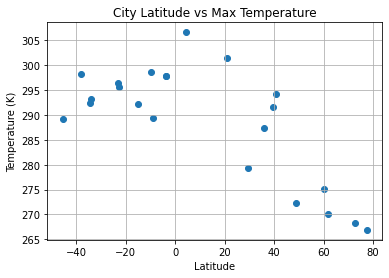

In [10]:
#plot lat vs max tep scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], marker = "o")

#charting labels and grid
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (K)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
#plt.savefig("Lat_MaxTemp.png")

#show plt
plt.show()

## Latitude vs. Humidity Plot

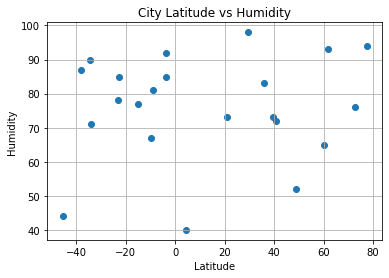

In [11]:
#plot lat vs humidity scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker = "o")

#charting labels and grid
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
#plt.savefig("Lat_Humidity.png")

#show plt
plt.show()

## Latitude vs. Cloudiness Plot

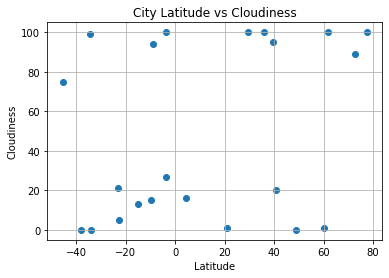

In [12]:
#plot lat vs clouds scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker = "o")

#charting labels and grid
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
#plt.savefig("Lat_Cloudiness.png")

#show plt
plt.show()

## Latitude vs. Wind Speed Plot

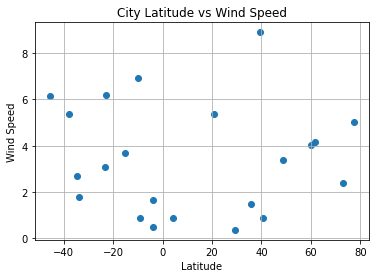

In [13]:
#plot lat vs windspeed scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker = "o")

#charting labels and grid
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
#plt.savefig("Lat_Wind.png")

#show plt
plt.show()

## Linear Regression

In [14]:
#loc fuction for northern hemishere 
n_hemi = weather_df.loc[weather_df["Latitude"]>=0]

n_hemi

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
7,Brigantine,39.4101,-74.3646,291.50,73,95,8.90,US,1635364760
8,Kahului,20.8947,-156.4700,301.47,73,1,5.36,US,1635364760
10,Nanortalik,60.1432,-45.2371,275.05,65,1,4.03,GL,1635364589
11,Qaanaaq,77.4840,-69.3632,266.90,94,100,5.01,GL,1635364761
12,Upernavik,72.7868,-56.1549,268.28,76,89,2.41,GL,1635364761
13,Wuchi,29.3786,103.0230,279.33,98,100,0.37,CN,1635364762
14,Kommunisticheskiy,61.6789,64.4819,270.18,93,100,4.16,RU,1635364762
15,Grand-Santi,4.2500,-54.3833,306.60,40,16,0.87,GF,1635364762
16,Atasū,48.6814,71.6433,272.26,52,0,3.39,KZ,1635364763
17,Hasaki,35.7333,140.8333,287.37,83,100,1.50,JP,1635364763


In [15]:
#loc function for southern hemisphere 
s_hemi = weather_df.loc[weather_df["Latitude"]<0]

s_hemi

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vao,-22.6667,167.4833,295.62,85,5,6.20,NC,1635364734
1,Mar del Plata,-38.0023,-57.5575,298.16,87,0,5.36,AR,1635364750
2,Cape Town,-33.9258,18.4232,293.20,71,0,1.79,ZA,1635364724
3,Coyhaique,-45.5752,-72.0662,289.12,44,75,6.17,CL,1635364562
4,Hermanus,-34.4187,19.2345,292.48,90,99,2.70,ZA,1635364759
5,Airai,-8.9266,125.4092,289.33,81,94,0.89,TL,1635364759
6,Mossamedes,-15.1961,12.1522,292.22,77,13,3.67,AO,1635364760
9,Bengkulu,-3.8004,102.2655,297.83,85,100,1.64,ID,1635364761
18,Rikitea,-23.1203,-134.9692,296.34,78,21,3.10,PF,1635364634
19,Kendari,-3.9450,122.4989,297.73,92,27,0.48,ID,1635364763


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

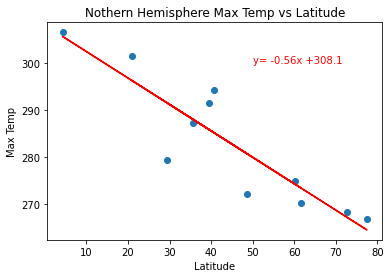

The r-value is: -0.8977103575693094


In [24]:
#scatter plot the r value Northern Hemisphere - Max Temp vs. Latitude
x_values = n_hemi["Latitude"]
y_values = n_hemi["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Nothern Hemisphere Max Temp vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(50,300), color = "red")

#save the figure
#plt.savefig("N_Temp_Lat.png")

#show plt
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

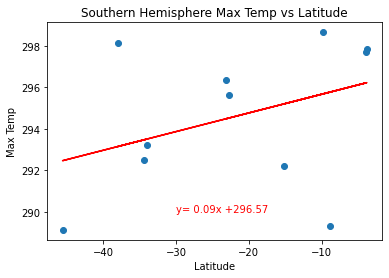

The r-value is: 0.3749598387064417


In [27]:
#scatter plot the r value Southern Hemisphere - Max Temp vs. Latitude
x_values = s_hemi["Latitude"]
y_values = s_hemi["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemisphere Max Temp vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(-30,290), color = "red")

#save the figure
#plt.savefig("S_Temp_Lat.png")

#show plt
plt.show()
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

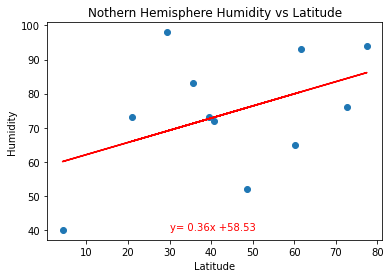

The r-value is: 0.4482118107052376


In [32]:
#scatter plot the r value Northern Hemisphere - Humididty vs. Latitude
x_values = n_hemi["Latitude"]
y_values = n_hemi["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Nothern Hemisphere Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(30,40), color = "red")

#save the figure
#plt.savefig("N_Humidity_Lat.png")

#show plt
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

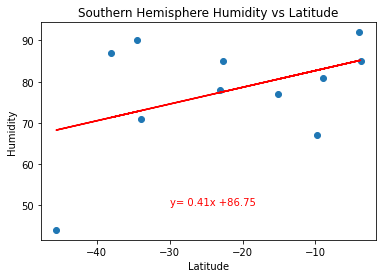

The r-value is: 0.43538273075887257


In [33]:
#scatter plot the r value Southern Hemisphere - Humididty vs. Latitude
x_values = s_hemi["Latitude"]
y_values = s_hemi["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemisphere Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-30,50), color = "red")

#save the figure
#plt.savefig("S_Humidity_Lat.png")

#show plt
plt.show()
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

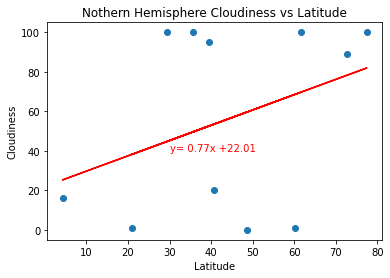

The r-value is: 0.36412662540323965


In [35]:
#scatter plot the r value Northern Hemisphere - clouds vs. Latitude
x_values = n_hemi["Latitude"]
y_values = n_hemi["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Nothern Hemisphere Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(30,40), color = "red")

#save the figure
#plt.savefig("N_Clouds_Lat.png")

#show plt
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

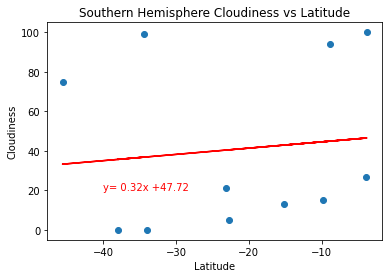

The r-value is: 0.11062591180928535


In [37]:
#scatter plot the r value southern Hemisphere - clouds vs. Latitude
x_values = s_hemi["Latitude"]
y_values = s_hemi["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemisphere Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-40,20), color = "red")

#save the figure
#plt.savefig("S_Clouds_Lat.png")

#show plt
plt.show()
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

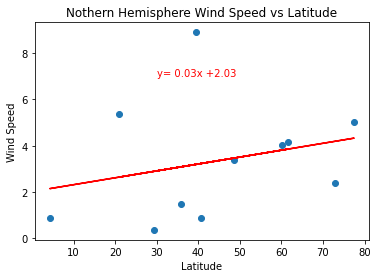

The r-value is: 0.26201219861953906


In [39]:
#scatter plot the r value Northern Hemisphere - wind vs. Latitude
x_values = n_hemi["Latitude"]
y_values = n_hemi["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Nothern Hemisphere Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(30,7), color = "red")

#save the figure
#plt.savefig("N_Winds_Lat.png")

#show plt
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

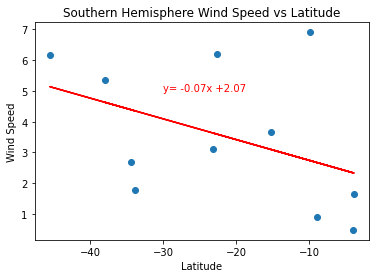

The r-value is: -0.42851651577917976


In [42]:
#scatter plot the r value Southern Hemisphere - wind vs. Latitude
x_values = s_hemi["Latitude"]
y_values = s_hemi["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemisphere Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(-30,5), color = "red")

#save the figure
#plt.savefig("S_Winds_Lat.png")

#show plt
plt.show()
print(f"The r-value is: {rvalue}")